- Submitter: Nabilah Adani
- Date: May 1st, 2022

---

# I. Introduction

- In this dataset, we're creating a machine learning model about Titanic survivors with type classification from https://www.kaggle.com/c/titanic
- The original dataset includes two separate files, which are train.csv and test.csv. However, we will use only train.csv dataset.
- The purpose of this ML model is to look for the most better-suited algorithm for determining a passenger's survival in Titanic.
- This dataset was chosen because it serves an introductory level dataset for new learners of machine learning algorithms.

### Project Abstract

_The sinking of the Titanic is one of the most infamous shipwrecks in history._

_On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew._

_While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others._

### Data Dictionary:

- survival: Survival status
- pclass: Ticket class
- sex: Sex
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- arch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of embarkation

# II. Importing Required Libraries

In [1]:
# import numerical processing packages
import numpy as np
import pandas as pd

# import visualization packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

# import machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import other required packages for creating ML models
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler # move data to the centre
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# import visualization packages for decision tree
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

# III. Data Loading and Exploratory Data Analysis

In [2]:
# import csv

df = pd.read_csv("dataset/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# check the number of unique values in each column

df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
# note that we will not need several columns that have completely unique values in most rows
# therefore, we will drop these columns

df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# we will now check for any null values

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Text(0.5, 1.0, 'Age Distribution of Titanic Passengers')

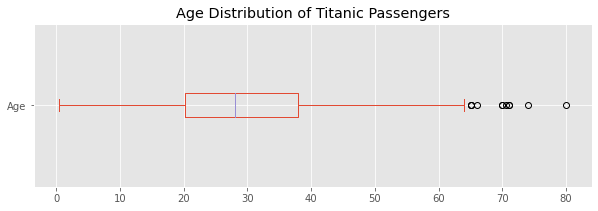

In [7]:
# notice that the column 'Age' has a lot of null values. but it's a waste of data if we drop these rows since it makes up almost 25% of the data.
# we will therefore fill the column with either median or mean
# to know which one is best, we will first visualize the data to see if there are many outliers in this data

boxplot = df["Age"].plot(kind="box", 
                         vert=False,
                        figsize=(10,3))
boxplot
boxplot.set_title("Age Distribution of Titanic Passengers")

- Note that there are several outliers in the high endmemmber values

In [8]:
# we will now compare values of the median and mean

print("Mean:", df["Age"].mean())
print("Median:", df["Age"].median())

Mean: 29.69911764705882
Median: 28.0


In [9]:
# the mean and median do not have too much difference
# because of the outliers, we will use median to fill the null values in 'Age'

df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
# we will now drop the null "Embarked" row

df.dropna(subset=['Embarked'], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [13]:
# check unique values in each column

col_list = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
for col in col_list:
    print(col)
    print()
    print(df[col].value_counts())

Survived

0    549
1    340
Name: Survived, dtype: int64
Pclass

3    491
1    214
2    184
Name: Pclass, dtype: int64
Sex

male      577
female    312
Name: Sex, dtype: int64
Age

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64
SibSp

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Fare

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64
Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64


# IV. Data Preprocessing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [15]:
# we will now start preparing the data for machine learning model development
# we will first encode the data that is non-numerical

# make a list of columns to be encoded from string to integer
encoded_cols = ['Sex', 'Embarked']

# run the encoder
encoder = LabelEncoder()

for col in encoded_cols:
    df[col] = encoder.fit_transform(df[col])
    print(col, encoder.classes_)

Sex ['female' 'male']
Embarked ['C' 'Q' 'S']


In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
# separate features and target

features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
target = df['Survived']

# check the shape to ensure it's correct

print(features.shape, target.shape)

(889, 7) (889,)


In [18]:
# split training data and test data
# we use 50:50 division between training and testing data
# when using less than these ratio of data, all algorithms tend to overfit to the training data

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.5)

print(x_train.shape, x_test.shape)

(444, 7) (445, 7)


In [19]:
# we will also later need to visualize the confusion matrix
# we will keep the function over here to be used in each model later

def visualizeCM(cm):    
    nolabels = len(cm)
    fig, ax = plt.subplots(figsize=(nolabels, nolabels))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs', color='black')
    ax.xaxis.set(ticks=range(nolabels))
    ax.yaxis.set(ticks=range(nolabels))
    ax.set_ylim(nolabels-0.5, -0.5)
    for i in range(nolabels):
        for j in range(nolabels):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

# V. Model Definition & Training
- For this dataset, we will use Naive Bayes algorithm to build our model
- The algorithm was chosen because it does not produce overfitted model compared to other algorithms (see Appendix to see how other algorithms perform)
- With this algorithm, it is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction. When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data. (https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf#:~:text=Advantages,you%20need%20less%20training%20data.)
- Due to its simplicity yet better accuracy compared to the more complex algorithms (see Appendix), this algorithm was used for this project

In [20]:
# create and train model
model_nb = GaussianNB().fit(x_train, y_train)
print(model_nb)

GaussianNB()


# VI. Model Evaluation

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       275
           1       0.71      0.75      0.73       170

    accuracy                           0.79       445
   macro avg       0.77      0.78      0.78       445
weighted avg       0.79      0.79      0.79       445

[[222  53]
 [ 42 128]]


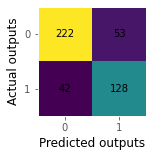

In [21]:
# evaluate model
y_pred = model_nb.predict(x_test)

# check the result report and the visualization matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

### Using training dataset (to check any possibility of overfitting)

- To ensure that the model is not overfitted, we will check with the train dataset as well.
- If the accuracy between using the training dataset vs. testing dataset is not very contrasting, the model is assumed to be acceptable.

GaussianNB()
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       274
           1       0.77      0.70      0.73       170

    accuracy                           0.81       444
   macro avg       0.80      0.79      0.79       444
weighted avg       0.80      0.81      0.80       444

[[239  35]
 [ 51 119]]


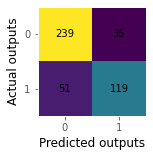

In [22]:
# create and train model
model_nb_train = GaussianNB().fit(x_train, y_train)
print(model_nb_train)

# evaluate model
y_pred = model_nb_train.predict(x_train)

# check the result report and the visualization matrix
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
visualizeCM(confusion_matrix(y_train, y_pred))

- Note that the accuracy is rather similar between training model and testing model, therefore the model did not overfit and is acceptable.

# VII. Conclusion

- Naive Bayes model, albeit its simplicity, is proven to give one of the highest accuracy for this particular dataset and did not overfit.
- Trial and error process showed that the percentage of training vs. testing dataset also affects the accuracy of both testing and testing models. Therefore, here we use 50% for each training and testing data.
- Naive Bayes also gives faster results compared to other algorithms.

---

# _Appendix_

### Random Forest Classifier

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       275
           1       0.75      0.69      0.72       170

    accuracy                           0.79       445
   macro avg       0.78      0.77      0.78       445
weighted avg       0.79      0.79      0.79       445

[[235  40]
 [ 52 118]]


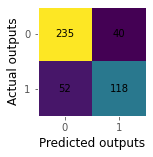

In [23]:
# build and train model
model_rf = RandomForestClassifier().fit(x_train, y_train)
print(model_rf)

# evaluate model
y_pred = model_rf.predict(x_test)

# check the result report and the visualization matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

In [24]:
# create dataframe of importance of each feature

df_imp_rf = pd.DataFrame({"feature name": features.columns, "value of importance": model_rf.feature_importances_}).sort_values(by="value of importance", ascending=False)
df_imp_rf.set_index('feature name', inplace=True)
df_imp_rf

,value of importance
feature name,
Sex,0.259689
Age,0.253716
Fare,0.244501
Pclass,0.084103
SibSp,0.062104
Parch,0.052958
Embarked,0.042929


RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       274
           1       1.00      0.96      0.98       170

    accuracy                           0.99       444
   macro avg       0.99      0.98      0.99       444
weighted avg       0.99      0.99      0.99       444

[[274   0]
 [  6 164]]


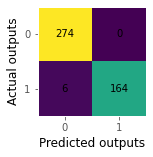

In [25]:
# run the model for training dataset to check overfitting possibility

# create and train model
model_rf_train = RandomForestClassifier().fit(x_train, y_train)
print(model_rf_train)

# evaluate model using training dataset
y_pred = model_rf_train.predict(x_train)

# check the result report and the visualization matrix
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
visualizeCM(confusion_matrix(y_train, y_pred))

- Note the very contrasting difference between accuracy of training model and testing model, indicating overfitting.

---

### K-Nearest Neighbors

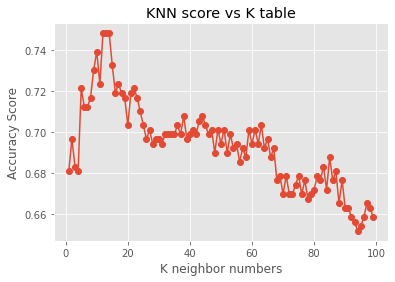

In [26]:
# first, we will look at how many 'K' or iteration required until the model is stable

def knnTableTrainTest(maxK, x_train, y_train, x_test, y_test):
    list_score = []
    for n in range(1, maxK):
        model_knn = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
        score = model_knn.score(x_test, y_test)
        list_score.append(score)

    plt.plot(range(1,maxK), list_score, marker="o")
    plt.xlabel("K neighbor numbers")
    plt.ylabel("Accuracy Score")
    plt.title("KNN score vs K table")
    
knnTableTrainTest(100, x_train, y_train, x_test, y_test)

- Note that in K-Nearest Neighbor iteration, there isn't a number of iteration after which the model stabilizes. Therefore this algorithm is not used.

---

### Support Vector Machine

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       275
           1       0.73      0.68      0.71       170

    accuracy                           0.78       445
   macro avg       0.77      0.76      0.77       445
weighted avg       0.78      0.78      0.78       445

[[233  42]
 [ 54 116]]


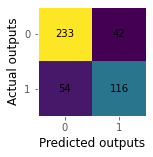

In [27]:
# create and train model
model_svc = SVC(kernel="linear").fit(x_train, y_train)
print(model_svc)

# evaluate model
y_pred = model_svc.predict(x_test)

# check the result report and the visualization matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       274
           1       0.75      0.68      0.71       170

    accuracy                           0.79       444
   macro avg       0.78      0.77      0.77       444
weighted avg       0.79      0.79      0.79       444

[[235  39]
 [ 55 115]]


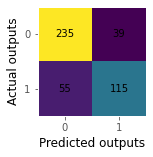

In [28]:
# run the model for training dataset to check overfitting possibility

# create and train model
model_svc_train = SVC(kernel="linear").fit(x_train, y_train)
print(model_svc_train)

# evaluate model using training dataset
y_pred = model_svc_train.predict(x_train)

# check the result report and the visualization matrix
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
visualizeCM(confusion_matrix(y_train, y_pred))

- Note that the result is almost similar to Naive Bayes method.
- However, because Naive Bayes algorithm is much simpler compared to SVC and results in similar accuracy, the SVC model is not chosen.

---

### Logistic Regression

C:\Users\nadani2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       275
           1       0.73      0.72      0.72       170

    accuracy                           0.79       445
   macro avg       0.78      0.78      0.78       445
weighted avg       0.79      0.79      0.79       445

[[229  46]
 [ 48 122]]


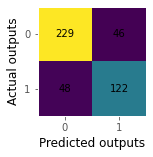

In [29]:
# create and train model
model_lr = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
print(model_lr)

# evaluate model
y_pred = model_lr.predict(x_test)

# check the result report and the visualization matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

C:\Users\nadani2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       274
           1       0.75      0.72      0.74       170

    accuracy                           0.80       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.80      0.80      0.80       444

[[234  40]
 [ 47 123]]


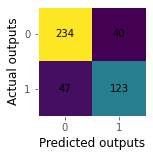

In [30]:
# run the model for training dataset to check overfitting possibility

# create and train model
model_lr_train = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
print(model_lr_train)

# evaluate model using training dataset
y_pred = model_lr_train.predict(x_train) # use test data if we separate test vs train data, but in this case the same

# check the result report and the visualization matrix
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
visualizeCM(confusion_matrix(y_train, y_pred))

- Note that the accuracy is similar to Naive Bayes model, however this one gives a residual error therefore not chosen

---